# Reading the Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv(r"C:\Users\rijul\Learnbay\Python_classes (7th nov onwards)\Datasets\Titanic.csv")

In [2]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#checking shape of the data 
data.shape

(891, 12)

In [4]:
#checking if datatypes are all alright 
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# 1. Performing Missing value and outlier treatment on the columns 

## 1.1 Missing Values 

In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#missing values as percentage
((data.isnull().sum())*(100))/len(data)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [7]:
#we can drop the cabin column as no significant learning can be drawn from this column due to more than 70% missing values
del data['Cabin']

In [8]:
# Finding description of the data before treating missing values of other two columns (age & embarked)

In [9]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


C:\Users\rijul\AppData\Local\Temp\ipykernel_29732\2905133699.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


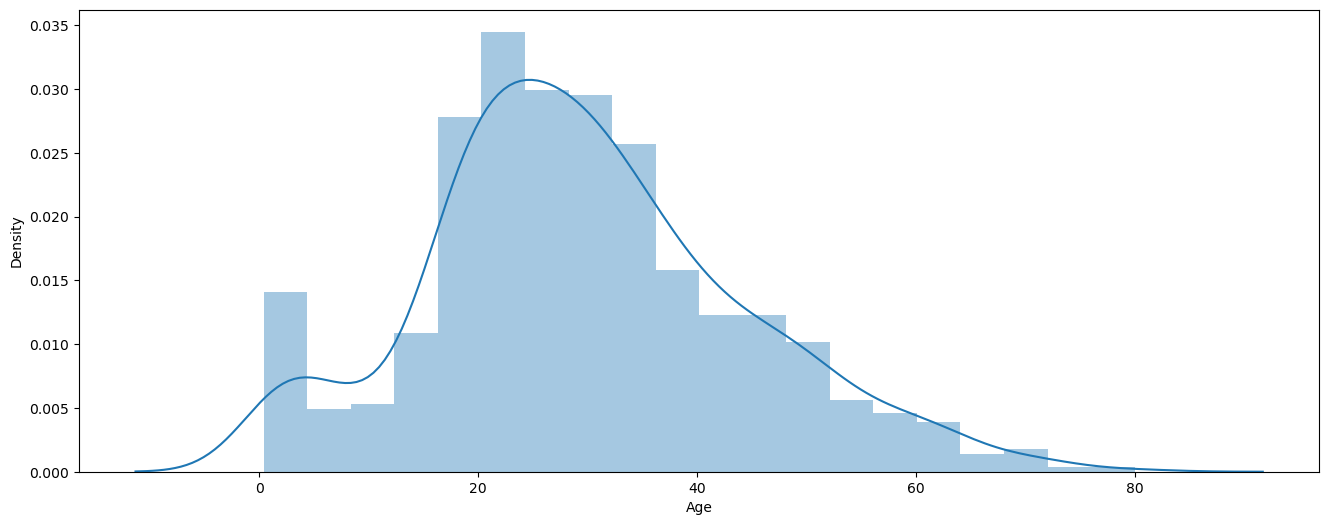

In [10]:
#plot the Age distribution
plt.figure(figsize = (16,6))
sns.distplot(data['Age'])
plt.show()

In [11]:
#since age distribution is not a normal distribution curve, we will replace the missing values with median age, 
#to help avoid any loss of information in the data

In [12]:
median_age = data['Age'].median()
median_age

28.0

In [13]:
data['Age'].fillna(median_age, inplace=True)

In [14]:
#now lets treat missing values in embarked column. This column is categorical in nature with 2 missing values 
#hence those missing values will be replace by the mode

In [15]:
embarked_mode = data['Embarked'].mode().iloc[0]
embarked_mode

'S'

In [16]:
data['Embarked'].fillna(embarked_mode, inplace=True)

In [17]:
#all missing values are treated, lets see the count of missing values again to re affirm the fact 
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## 1.2 Outlier Treatment

In [18]:
# lets see the description of data again 
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
# statistically speaking, if the mean and the median (50% value) in a column are same then it means there are no outliers,
# and only if the difference between the two is more than 8% then we start to remove the outliers. But for the sake of the 
# task, lets see the box plots for each actual numerical column and then decide on outlier treatment via iqr method.

In [20]:
#before that, lets set the passengerID as index as no inference can be drawn from the passenger id as well 
data = data.set_index('PassengerId')

In [21]:
data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S


In [22]:
# lets see the box plots for each numerical column and then decide on outlier treatment via iqr method. Now, even though 
# columns like Survived, Pclass, SibSp, Parch appear numerical columns but they represent categorical values hence will not 
# be considered for outlier removal. And anyhow we will performing Data Preprocessing to make data fit for logistic 
# regression as well as Random forest model
# MOREOVER - THESE COLUMNS HAVE LESS THAN 1 UNIT DIFFERENCE BETWEEN MEAN AND MEDIAN HENCE OUTLIER REMOVAL IN THESE COLUMNS
# WILL NOT MAKE ANY DIFFERENCE STATISTICALLY. 

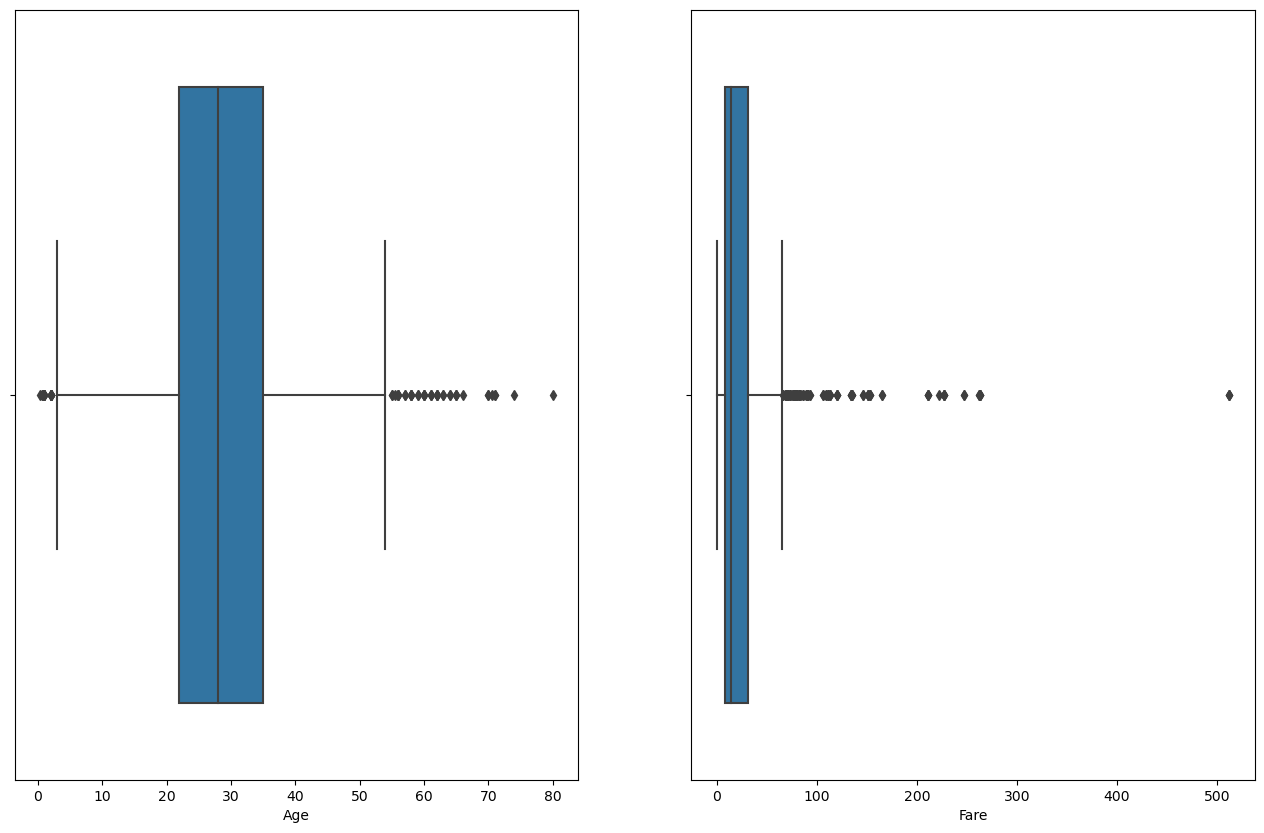

In [23]:
figbi, axesbi = plt.subplots(1,2, figsize=(16, 10))
sns.boxplot(x="Age", data=data,ax=axesbi[0])
sns.boxplot(x="Fare", data=data,ax=axesbi[1])
plt.show()

In [24]:
#using iqr method to remove outliers

In [25]:
#for age
q1 = data.Age.quantile(0.25)
q3 = data.Age.quantile(0.75)
print(q1,q3)

iqr=q3-q1
print(iqr)

upper=q3+1.5*iqr
lower=q1-(1.5*iqr)

data.Age = data.Age.clip(lower=lower, upper=upper)

22.0 35.0
13.0


In [26]:
#for fare
q1 = data.Fare.quantile(0.25)
q3 = data.Fare.quantile(0.75)
print(q1,q3)

iqr=q3-q1
print(iqr)

upper=q3+1.5*iqr
lower=q1-(1.5*iqr)

data.Fare = data.Fare.clip(lower=lower, upper=upper)

7.9104 31.0
23.0896


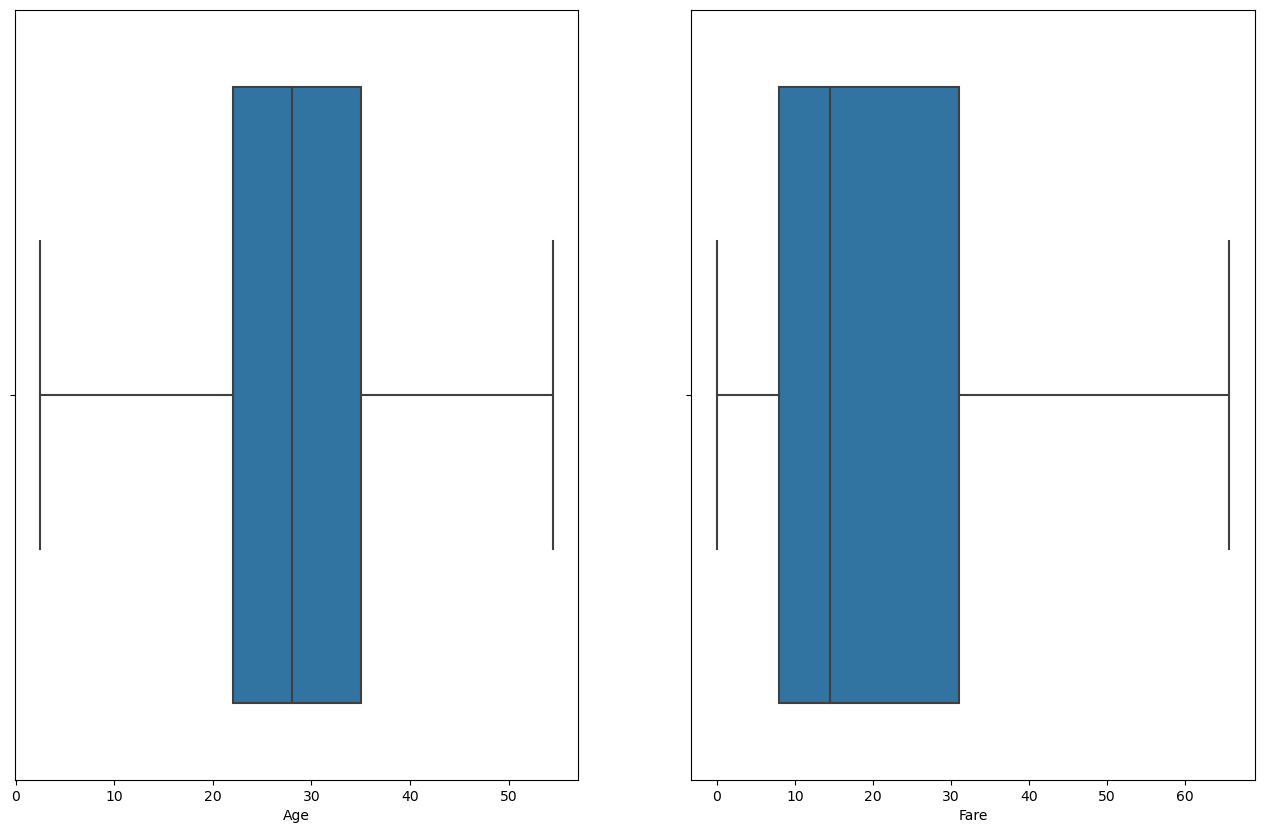

In [27]:
#lets see box plots again to reaffirm the operation of outlier removal
figbi, axesbi = plt.subplots(1,2, figsize=(16, 10))
sns.boxplot(x="Age", data=data,ax=axesbi[0])
sns.boxplot(x="Fare", data=data,ax=axesbi[1])
plt.show()

C:\Users\rijul\AppData\Local\Temp\ipykernel_29732\2921343246.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

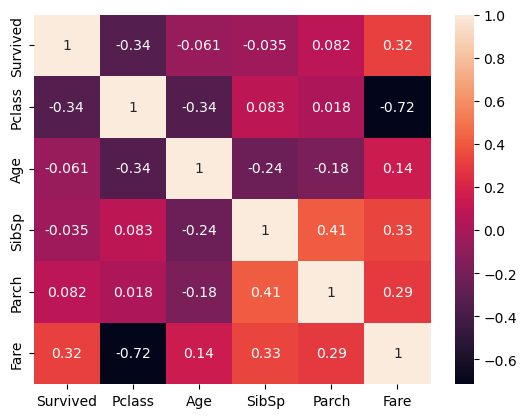

In [28]:
#lets also plot a heatmap to see if any columns are correlated to an extent where one of the columns can be dropped
sns.heatmap(data.corr(),annot=True)

In [29]:
#since col is dropped only if correlation is more that 75% at either side, we do not need to drop any column. 
# FURTHEMORE, THE LEFT COLUMNS ARE IMPORTANT FOR OUR FUTURE ANALYSIS THAT WE WILL NOW PERFORM. 

# 2. Performing Logistic Regression

In [30]:
#making a separate copy for logistic regression 
data_L=data.copy()

In [31]:
data_L.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [32]:
#lets drop columns which will not affect or have an impact on our predictive model aka redundant columns. Like 
 # Name & Ticket. 

In [33]:
del data_L['Name']
del data_L['Ticket']

In [34]:
data_L.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,65.6344,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [35]:
# now lets convert Sex and Embarked column to numbers instead of alphabets for ease of analysis

In [36]:
#for sex column 

sex_mapping = {'male': 0, 'female': 1}

data_L['Sex'] = data_L['Sex'].map(sex_mapping)

In [37]:
# for embarked column 

em_mapping = {'S': 0, 'C': 1, 'Q': 2}

data_L['Embarked'] = data_L['Embarked'].map(em_mapping)

In [38]:
data_L.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,0
2,1,1,1,38.0,1,0,65.6344,1
3,1,3,1,26.0,0,0,7.9250,0
4,1,1,1,35.0,1,0,53.1000,0
5,0,3,0,35.0,0,0,8.0500,0


In [39]:
#importing libraries necessary for logistic regression 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [40]:
X = data_L[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']].values
y = data[['Survived']].values

## Standardization

In [41]:
sc = StandardScaler()
X = sc.fit_transform(X)

## Train-Test-Split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 291, random_state = 101)

## Logistoc Regression model

In [43]:
y_train = y_train.ravel()
y_test = y_test.ravel()
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)

LogisticRegression()

## Predictions

In [44]:
y_pred=logreg.predict(X_test)

In [45]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0], dtype=int64)

## Performance and accuracy

In [46]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) #y test is the actuals
cnf_matrix

array([[142,  24],
       [ 39,  86]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

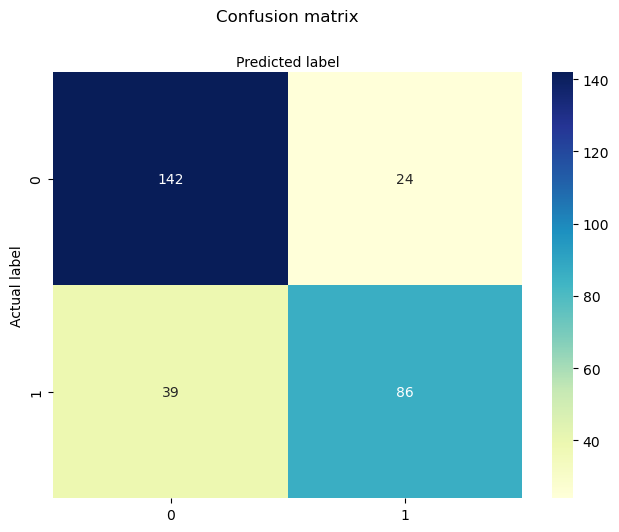

In [47]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [48]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7835051546391752
Precision: 0.7818181818181819
Recall: 0.688


# 3. Performing RFA

In [49]:
#making a separate copy for RFA
data_R = data.copy()

In [50]:
data_R.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [51]:
#we have already treated missing values and outliers so we may directly begin with our model

In [52]:
#dropping columns that are not needed
del data_R['Name']
del data_R['Ticket']

In [53]:
data_R.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,65.6344,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [54]:
# now lets convert Sex and Embarked column to numbers instead of alphabets for ease of analysis

In [55]:
# for sex column
sex_mapping = {'male': 0, 'female': 1}

data_R['Sex'] = data_R['Sex'].map(sex_mapping)

In [56]:
# for embarked column 

em_mapping = {'S': 0, 'C': 1, 'Q': 2}

data_R['Embarked'] = data_R['Embarked'].map(em_mapping)

In [57]:
data_R.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,0
2,1,1,1,38.0,1,0,65.6344,1
3,1,3,1,26.0,0,0,7.9250,0
4,1,1,1,35.0,1,0,53.1000,0
5,0,3,0,35.0,0,0,8.0500,0


In [58]:
A = data_L[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']].values
b = data[['Survived']].values

In [59]:
# Random Forests are not as sensitive to feature scaling as some other algorithms, and they can handle features with 
# different scales and units without much impact on their performance.

## Train-Test-Split

In [60]:
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size = 291, random_state = 101)

In [61]:
# Cleaning test sets to avoid future warning messages
b_train = b_train.ravel() 
b_test = b_test.ravel() 

## Random forest classifier

In [62]:
# Import modules
%matplotlib inline

import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from urllib.request import urlopen 

plt.style.use('ggplot')
pd.set_option('display.max_columns', 500) 

In [63]:
# Set the random state for reproducibility
fit_rf = RandomForestClassifier(random_state=42) 

In [64]:
# now we will find best parameters using GridSearchCV and best n estimator by oob rate

## Gridsearch

In [65]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2,3,4,5,6,7,8,9,10],
              'bootstrap': [True, False],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2', None],  #on each tree
              'criterion': ['gini', 'entropy']              }

cv_rf = GridSearchCV(fit_rf, cv = 10,         #random forest object and cross validation 
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(A_train, b_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))  #is in seconds

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Time taken in grid search:  608.19


In [66]:
# Set best parameters given by grid search 
fit_rf.set_params(criterion = 'gini',
                  max_features = 'sqrt', 
                  max_depth = 6,
                  bootstrap = True,
                  min_samples_split = 2,
                  min_samples_leaf = 1)

RandomForestClassifier(max_depth=6, random_state=42)

## OOB rate for n estimator

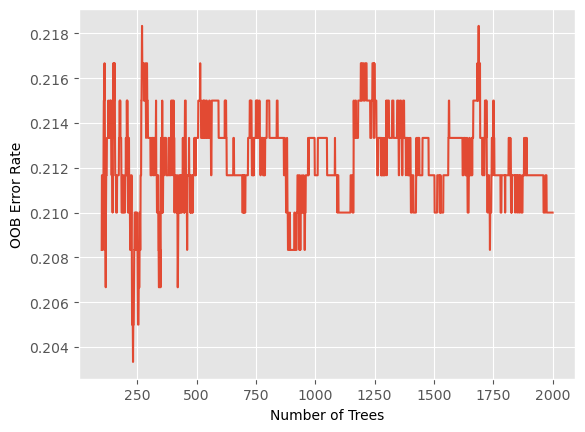

In [69]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
fit_rf = RandomForestClassifier(warm_start=True, oob_score=True, random_state=42)

min_estimators = 100  # minimum number of trees
max_estimators = 2000  # max number of trees

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(A_train, b_train)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

# Store and visualize the OOB error rates
import matplotlib.pyplot as plt

error_rate_list = list(error_rate.values())
plt.plot(range(min_estimators, max_estimators + 1), error_rate_list)
plt.xlabel("Number of Trees")
plt.ylabel("OOB Error Rate")
plt.show()

#the error seems to be stabalizing near 1800 to 2000 trees but let's check with more number of tress 
# to see if error rate can be further minimized

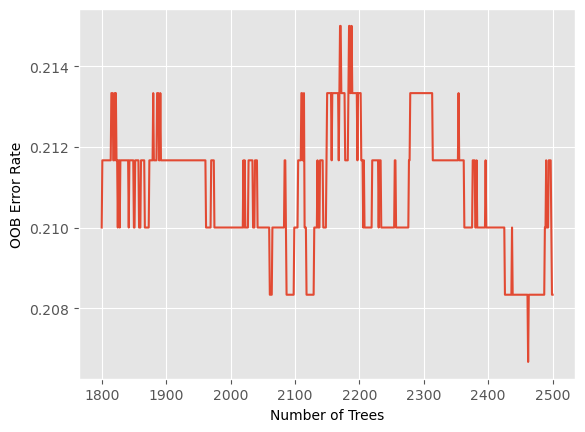

In [70]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
fit_rf = RandomForestClassifier(warm_start=True, oob_score=True, random_state=42)

min_estimators = 1800  # minimum number of trees
max_estimators = 2500 # max number of trees

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(A_train, b_train)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

# Store and visualize the OOB error rates
import matplotlib.pyplot as plt

error_rate_list = list(error_rate.values())
plt.plot(range(min_estimators, max_estimators + 1), error_rate_list)
plt.xlabel("Number of Trees")
plt.ylabel("OOB Error Rate")
plt.show()

In [71]:
#the error rate seems to be most stable between 1800 to 2000 only hence we will take our n estimator as 1900

In [76]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)
print('OOB Error rate for 1900 trees is: {0:.5f}'.format(oob_series[1900]))

OOB Error rate for 1900 trees is: 0.21167


In [80]:
# Set best parameters given by grid search 
fit_rf.set_params(criterion = 'gini',
                  n_estimators=1900,
                  max_features = 'sqrt', 
                  max_depth = 6,
                  bootstrap = True,
                  min_samples_split = 2,
                  min_samples_leaf = 1,
                  warm_start=False,   
                  oob_score=False)

RandomForestClassifier(max_depth=6, n_estimators=1900, random_state=42)

In [81]:
fit_rf.fit(A_train, b_train)

RandomForestClassifier(max_depth=6, n_estimators=1900, random_state=42)

## Predictions

In [82]:
predictions_rf = fit_rf.predict(A_test)

In [85]:
def create_conf_mat(b_test, predictions):
    """Function returns confusion matrix comparing two arrays"""
    if (len(b_test.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (b_test.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = b_test,
                                        columns = predictions)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

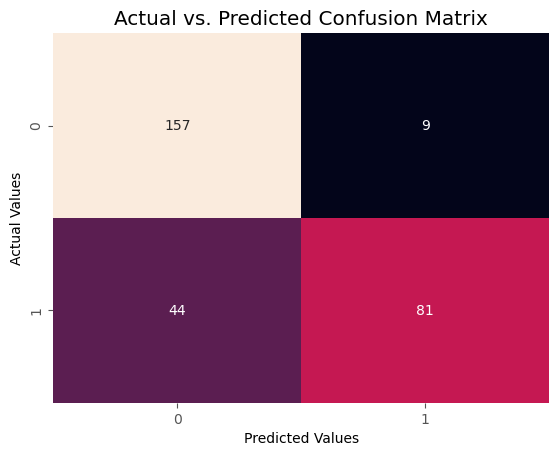

In [86]:
conf_mat = create_conf_mat(b_test, predictions_rf)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [87]:
#ACCURACY

accuracy_rf = fit_rf.score(A_test, b_test)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_rf))

Here is our mean accuracy on the test set:
 0.818


In [88]:
#ERROR RATE

# Here we calculate the test error rate!
test_error_rate_rf = 1 - accuracy_rf
print("The test error rate for our model is:\n {0: .4f}"\
      .format(test_error_rate_rf))

The test error rate for our model is:
  0.1821
